In [11]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
import sys
sys.path.append("../src")
import electrostatic
import nanonets_utils

plt.style.use(["science","bright","grid"])
# plt.style.use('seaborn-v0_8-whitegrid')

# 2D Lattice Networks w/o disorder

In [12]:
# Parameter and Inti
N_x, N_y, N_z       = 9,9,1
electrode_pos       = [[0,N_y-1,0],[0,0,0],[N_x-1,0,0],[N_x//2,0,0],[N_x-1,N_y-1,0]]
# electrode_pos       = [[0,0,0],[N_x-1,0,0]]
electrode_type      = ['constant']*len(electrode_pos)
radius, radius_std  = 10.0, 0.0
eps_r, eps_s        = 2.6, 3.9
lattice             = electrostatic.electrostatic_class(electrode_type)

# Build Network and attach Electrodes
lattice.cubic_network(N_x, N_y, N_z)
lattice.set_electrodes_based_on_pos(electrode_pos, N_x, N_y)
# lattice.add_np_to_output()
lattice.init_nanoparticle_radius(radius, radius_std)
# lattice.update_nanoparticle_radius()
lattice.pack_planar_circles()

Text(0, 0.5, '$y$ [nm]')

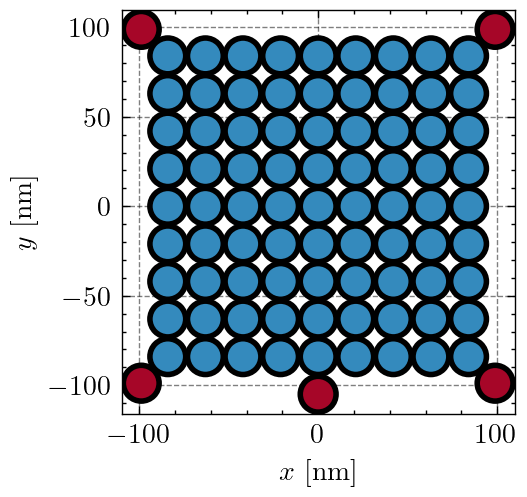

In [13]:
G       = lattice.return_graph_object()
pos     = lattice.return_np_pos()

fig, ax = plt.subplots(dpi=200)
ax.set_aspect('equal')
for u,v in G.edges():
    x0,y0 = pos[u]; x1,y1 = pos[v]
    ax.plot([x0,x1],[y0,y1], 'black', lw=2)

# Draw nanoparticle circles
for i in range(lattice.N_particles):
    x, y = pos[i]
    circle = plt.Circle((x, y), lattice.radius_vals[i], fill=True,
                        edgecolor='black', lw=2, zorder=2, facecolor=nanonets_utils.blue_color)
    ax.add_patch(circle)

# Draw electrodes and their connections
for i in range(lattice.N_particles):
    e = lattice.net_topology[i, 0]
    if e != lattice.NO_CONNECTION:
        enode = -int(e)
        x, y = pos[enode]
        # Draw electrode circle
        circ = plt.Circle((x, y), lattice.ELECTRODE_RADIUS, fill=True,
                          edgecolor='black', lw=2, zorder=2, facecolor=nanonets_utils.red_color)
        ax.add_patch(circ)

# Autoscale
xs = [p[0] for p in pos.values()]
ys = [p[1] for p in pos.values()]
pad = max(np.max(lattice.radius_vals), lattice.ELECTRODE_RADIUS) + 1
ax.set_xlim(min(xs) - pad, max(xs) + pad)
ax.set_ylim(min(ys) - pad, max(ys) + pad)
ax.set_xlabel("$x$ [nm]")
ax.set_ylabel("$y$ [nm]")

In [14]:
voltage_values = np.random.normal(size=len(electrode_type)+1)

lattice.calc_capacitance_matrix(eps_r=eps_r, eps_s=eps_s)
lattice.calc_electrode_capacitance_matrix()
lattice.init_charge_vector(voltage_values)

c_mat   = lattice.return_capacitance_matrix()
c_e_mat = lattice.return_electrode_capacitance_matrix()
q_vec   = lattice.return_charge_vector()

print("Capacitance Matrix:\n", np.round(c_mat,2))
print("Electrode Capacitance Matrix:\n", np.round(c_e_mat,2))
print("Voltage Vector:\n", np.round(voltage_values,2))
print("Initial Charge Vector:\n", np.round(q_vec,2))

Capacitance Matrix:
 [[33.56 -2.56 -0.74 ... -0.14 -0.13 -0.12]
 [-2.56 36.58 -2.56 ... -0.15 -0.14 -0.13]
 [-0.74 -2.56 38.42 ... -0.15 -0.15 -0.14]
 ...
 [-0.14 -0.15 -0.15 ... 37.92 -2.56 -0.74]
 [-0.13 -0.14 -0.15 ... -2.56 36.28 -2.56]
 [-0.12 -0.13 -0.14 ... -0.74 -2.56 33.36]]
Electrode Capacitance Matrix:
 [[0.16 0.16 0.15 0.15 0.14 0.13 0.13 0.12 0.11 0.18 0.18 0.17 0.16 0.15
  0.14 0.14 0.13 0.12 0.21 0.2  0.19 0.18 0.17 0.16 0.15 0.14 0.13 0.24
  0.23 0.22 0.2  0.19 0.17 0.16 0.14 0.13 0.29 0.28 0.26 0.23 0.21 0.19
  0.17 0.15 0.14 0.37 0.34 0.3  0.26 0.23 0.2  0.18 0.16 0.15 0.51 0.44
  0.37 0.3  0.26 0.22 0.19 0.17 0.15 0.81 0.6  0.44 0.34 0.28 0.23 0.2
  0.18 0.16 2.56 0.81 0.51 0.37 0.29 0.24 0.21 0.18 0.16]
 [2.56 0.81 0.51 0.37 0.29 0.24 0.21 0.18 0.16 0.81 0.6  0.44 0.34 0.28
  0.23 0.2  0.18 0.16 0.51 0.44 0.37 0.3  0.26 0.22 0.19 0.17 0.15 0.37
  0.34 0.3  0.26 0.23 0.2  0.18 0.16 0.15 0.29 0.28 0.26 0.23 0.21 0.19
  0.17 0.15 0.14 0.24 0.23 0.22 0.2  0.19 0.17 0.16

# 1D Lattice Networks w/o disorder

In [15]:
# Parameter and Inti
N_x, N_y, N_z       = 9,1,1
electrode_pos       = [[0,0,0],[N_x-1,0,0]]
electrode_type      = ['constant']*len(electrode_pos)
radius, radius_std  = 10.0, 0.0
eps_r, eps_s        = 2.6, 3.9
lattice             = electrostatic.electrostatic_class(electrode_type)

# Build Network and attach Electrodes
lattice.cubic_network(N_x, N_y, N_z)
lattice.set_electrodes_based_on_pos(electrode_pos, N_x, N_y)
# lattice.add_np_to_output()
lattice.init_nanoparticle_radius(radius, radius_std)
# lattice.update_nanoparticle_radius()
lattice.pack_planar_circles(alpha=0.05)

Text(0, 0.5, '$y$ [nm]')

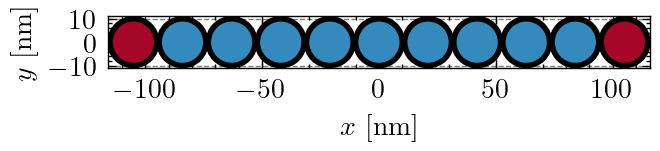

In [16]:
G       = lattice.return_graph_object()
pos     = lattice.return_np_pos()

fig, ax = plt.subplots(dpi=200)
ax.set_aspect('equal')
for u,v in G.edges():
    x0,y0 = pos[u]; x1,y1 = pos[v]
    ax.plot([x0,x1],[y0,y1], 'black', lw=2)

# Draw nanoparticle circles
for i in range(lattice.N_particles):
    x, y = pos[i]
    circle = plt.Circle((x, y), lattice.radius_vals[i], fill=True,
                        edgecolor='black', lw=2, zorder=2, facecolor=nanonets_utils.blue_color)
    ax.add_patch(circle)

# Draw electrodes and their connections
for i in range(lattice.N_particles):
    e = lattice.net_topology[i, 0]
    if e != lattice.NO_CONNECTION:
        enode = -int(e)
        x, y = pos[enode]
        # Draw electrode circle
        circ = plt.Circle((x, y), lattice.ELECTRODE_RADIUS, fill=True,
                          edgecolor='black', lw=2, zorder=2, facecolor=nanonets_utils.red_color)
        ax.add_patch(circ)

# Autoscale
xs = [p[0] for p in pos.values()]
ys = [p[1] for p in pos.values()]
pad = max(np.max(lattice.radius_vals), lattice.ELECTRODE_RADIUS) + 1
ax.set_xlim(min(xs) - pad, max(xs) + pad)
ax.set_ylim(min(ys) - pad, max(ys) + pad)
ax.set_xlabel("$x$ [nm]")
ax.set_ylabel("$y$ [nm]")

# 2D Lattice Networks with disorder

In [17]:
# Parameter and Inti
N_x, N_y, N_z       = 9,9,1
N_particles         = N_x*N_y
electrode_pos       = [[0,0,0],[N_x-1,0,0],[0,N_y-1,0],[N_x-1,N_y-1,0]]
electrode_type      = ['constant']*len(electrode_pos)
radius, radius_std  = 10.0, 0.0
eps_r, eps_s        = 2.6, 3.9
radius1, radius2    = 10.0, 20.0
lattice             = electrostatic.electrostatic_class(electrode_type)

# Build Network and attach Electrodes
lattice.cubic_network(N_x, N_y, N_z)
lattice.set_electrodes_based_on_pos(electrode_pos, N_x, N_y)
# lattice.add_np_to_output()
lattice.init_nanoparticle_radius(radius, radius_std)
lattice.update_nanoparticle_radius(np.random.choice(N_particles,size=N_particles//3),radius2)
lattice.pack_planar_circles(max_iter=0)

Text(0, 0.5, '$y$ [nm]')

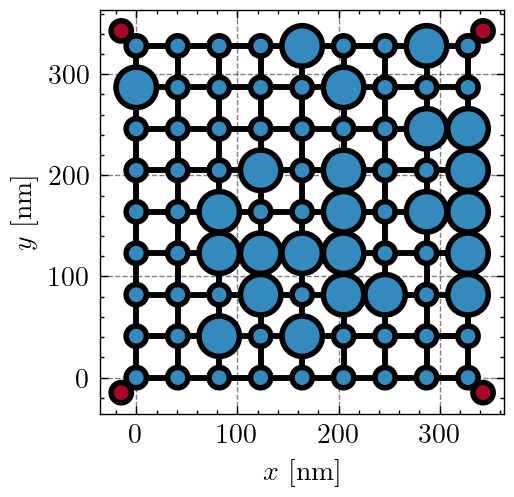

In [18]:
G       = lattice.return_graph_object()
pos     = lattice.return_np_pos()

fig, ax = plt.subplots(dpi=200)
ax.set_aspect('equal')
for u,v in G.edges():
    x0,y0 = pos[u]; x1,y1 = pos[v]
    ax.plot([x0,x1],[y0,y1], 'black', lw=2)

# Draw nanoparticle circles
for i in range(lattice.N_particles):
    x, y = pos[i]
    circle = plt.Circle((x, y), lattice.radius_vals[i], fill=True,
                        edgecolor='black', lw=2, zorder=2, facecolor=nanonets_utils.blue_color)
    ax.add_patch(circle)

# Draw electrodes and their connections
for i in range(lattice.N_particles):
    e = lattice.net_topology[i, 0]
    if e != lattice.NO_CONNECTION:
        enode = -int(e)
        x, y = pos[enode]
        # Draw electrode circle
        circ = plt.Circle((x, y), lattice.ELECTRODE_RADIUS, fill=True,
                          edgecolor='black', lw=2, zorder=2, facecolor=nanonets_utils.red_color)
        ax.add_patch(circ)

# Autoscale
xs = [p[0] for p in pos.values()]
ys = [p[1] for p in pos.values()]
pad = max(np.max(lattice.radius_vals), lattice.ELECTRODE_RADIUS) + 1
ax.set_xlim(min(xs) - pad, max(xs) + pad)
ax.set_ylim(min(ys) - pad, max(ys) + pad)
ax.set_xlabel("$x$ [nm]")
ax.set_ylabel("$y$ [nm]")

# Random Network Topology

In [19]:
# Parameter and Inti
N_particles         = 81
electrode_pos       = [[-1,-1],[1,-1],[-1,1],[1,1]]
electrode_type      = ['constant']*len(electrode_pos)
eps_r, eps_s        = 2.6, 3.9
radius1, radius2    = 10.0, 20.0
lattice             = electrostatic.electrostatic_class(electrode_type)

# Build Network and attach Electrodes
lattice.random_network(N_particles)
lattice.add_electrodes_to_random_net(electrode_pos)
lattice.graph_to_net_topology()
# lattice.add_np_to_output()
lattice.init_nanoparticle_radius(radius1, radius_std)
lattice.update_nanoparticle_radius(np.random.choice(N_particles,size=N_particles//3),radius2)
lattice.pack_planar_circles()

Text(0, 0.5, '$y$ [nm]')

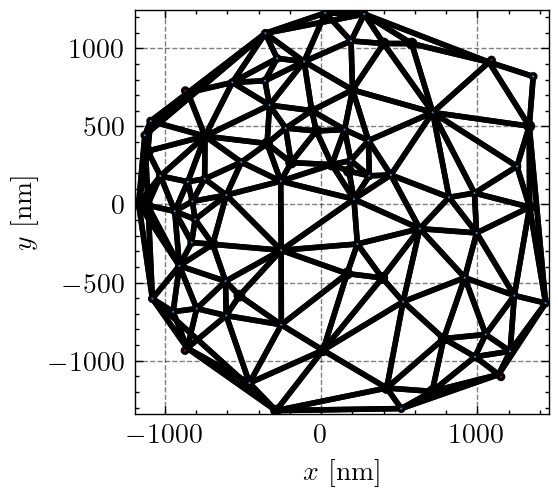

In [20]:
G       = lattice.return_graph_object()
pos     = lattice.return_np_pos()

fig, ax = plt.subplots(dpi=200)
ax.set_aspect('equal')
for u,v in G.edges():
    x0,y0 = pos[u]; x1,y1 = pos[v]
    ax.plot([x0,x1],[y0,y1], 'black', lw=2)

# Draw nanoparticle circles
for i in range(lattice.N_particles):
    x, y = pos[i]
    circle = plt.Circle((x, y), lattice.radius_vals[i], fill=True,
                        edgecolor='black', lw=2, zorder=2, facecolor=nanonets_utils.blue_color)
    ax.add_patch(circle)

# Draw electrodes and their connections
for i in range(lattice.N_particles):
    e = lattice.net_topology[i, 0]
    if e != lattice.NO_CONNECTION:
        enode = -int(e)
        x, y = pos[enode]
        # Draw electrode circle
        circ = plt.Circle((x, y), lattice.ELECTRODE_RADIUS, fill=True,
                          edgecolor='black', lw=2, zorder=2, facecolor=nanonets_utils.red_color)
        ax.add_patch(circ)

# Autoscale
xs = [p[0] for p in pos.values()]
ys = [p[1] for p in pos.values()]
pad = max(np.max(lattice.radius_vals), lattice.ELECTRODE_RADIUS) + 1
ax.set_xlim(min(xs) - pad, max(xs) + pad)
ax.set_ylim(min(ys) - pad, max(ys) + pad)
ax.set_xlabel("$x$ [nm]")
ax.set_ylabel("$y$ [nm]")